In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data =pd.read_csv('resources/cybersecurity_intrusion_data.csv')
data.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [6]:
data.shape

(9537, 11)

In [7]:
#drop the session_id column
data.drop(columns=["session_id"], inplace=True) 

In [8]:
#reduce the number of coulmns of the protocol_type into only two columns labeled either 0 or 1 if both columns are zero then its TCP protocol  
data = pd.get_dummies(data, columns=["protocol_type"], drop_first=True) 

In [9]:
print(data.isnull().sum())

network_packet_size       0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
protocol_type_TCP         0
protocol_type_UDP         0
dtype: int64


In [10]:
# Make a copy so we don't affect your original DataFrame
data_corr = data.copy()

# One-hot encode categorical columns (include all dummies to see their individual impact)
data_corr = pd.get_dummies(data_corr, columns=['encryption_used', 'browser_type'], drop_first=False)

In [11]:
# Compute correlations
correlation_matrix = data_corr.corr()

# Sort by correlation with attack_detected
correlation_with_target = correlation_matrix['attack_detected'].sort_values(ascending=False)

# Display top correlations (optional)
print(correlation_with_target.head(10))

attack_detected         1.000000
failed_logins           0.363726
login_attempts          0.277320
ip_reputation_score     0.211540
browser_type_Unknown    0.134630
session_duration        0.041602
unusual_time_access     0.008652
encryption_used_DES     0.008306
protocol_type_UDP       0.007903
protocol_type_TCP       0.000643
Name: attack_detected, dtype: float64


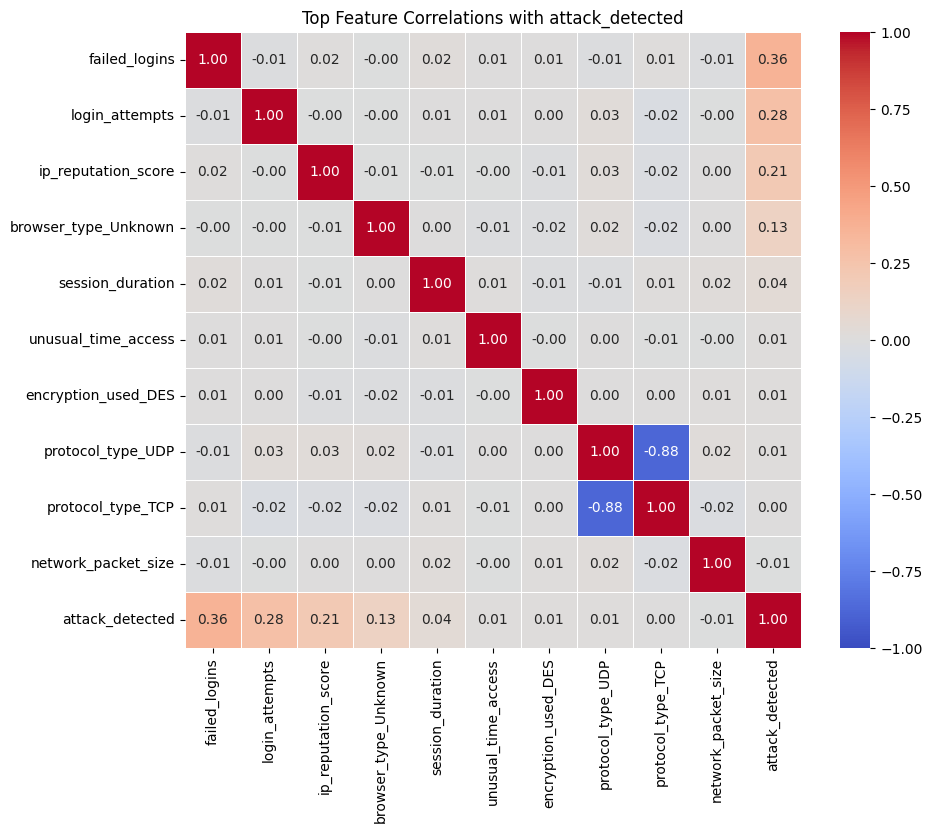

In [12]:
# Focused heatmap (optional: top 10 features most correlated with attack_detected)
plt.figure(figsize=(10, 8))
top_features = correlation_with_target[1:11].index  # Skip 'attack_detected' itself
sns.heatmap(data_corr[top_features.tolist() + ['attack_detected']].corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title("Top Feature Correlations with attack_detected")
plt.show()


In [13]:
data.drop(columns=['encryption_used'], inplace=True) #due to poor correlation of the encryption_used feature it will be droped

In [14]:
print(data.columns)

Index(['network_packet_size', 'login_attempts', 'session_duration',
       'ip_reputation_score', 'failed_logins', 'browser_type',
       'unusual_time_access', 'attack_detected', 'protocol_type_TCP',
       'protocol_type_UDP'],
      dtype='object')


In [15]:
categorical_cols = ['browser_type']
data = pd.get_dummies(data, columns=categorical_cols)

In [16]:
data.head()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,599,4,492.983263,0.606818,1,0,1,True,False,False,True,False,False,False
1,472,3,1557.996461,0.301569,0,0,0,True,False,False,False,True,False,False
2,629,3,75.044262,0.739164,2,0,1,True,False,True,False,False,False,False
3,804,4,601.248835,0.123267,0,0,1,False,True,False,False,False,False,True
4,453,5,532.540888,0.054874,1,0,0,True,False,False,False,True,False,False


In [17]:
data = data.astype(int)

In [18]:
data.head()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,599,4,492,0,1,0,1,1,0,0,1,0,0,0
1,472,3,1557,0,0,0,0,1,0,0,0,1,0,0
2,629,3,75,0,2,0,1,1,0,1,0,0,0,0
3,804,4,601,0,0,0,1,0,1,0,0,0,0,1
4,453,5,532,0,1,0,0,1,0,0,0,1,0,0


([<matplotlib.patches.Wedge at 0x785248871e80>,
 [Text(0.1819662438547012, -1.0848448212059694, 'No attack detected'),
  Text(-0.18196711463627516, 1.084844675145225, 'Attack detected')],
 [Text(0.099254314829837, -0.5917335388396195, '55.3%'),
  Text(-0.09925478980160461, 0.5917334591701227, '44.7%')])

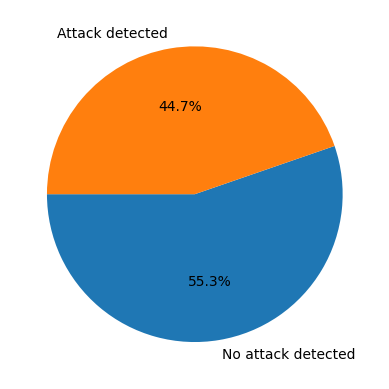

In [19]:
plt.pie(data['attack_detected'].value_counts(), labels=['No attack detected', 'Attack detected'], autopct='%1.1f%%', startangle=180)

In [31]:
# save data to csv
data.to_csv('resources/processed_cybersecurity_intrusion_data.csv', index=False)

In [ ]:
# Separate features and label
X = data.drop('attack_detected', axis=1)
y = data['attack_detected']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
print(f"X_train: {X_train.shape}\nx_test: {X_test.shape}\nY_train: {y_train.shape}\nY_test: {y_test.shape}")

X_train: (7629, 13)
x_test: (1908, 13)
Y_train: (7629,)
Y_test: (1908,)


# Prepare tensors for neural network

In [23]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, dataloader


In [24]:
X = data.iloc[:, data.columns != 'attack_detected']
y = data.iloc[:,data.columns == 'attack_detected']
X.head()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,protocol_type_TCP,protocol_type_UDP,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,599,4,492,0,1,0,1,0,0,1,0,0,0
1,472,3,1557,0,0,0,1,0,0,0,1,0,0
2,629,3,75,0,2,0,1,0,1,0,0,0,0
3,804,4,601,0,0,0,0,1,0,0,0,0,1
4,453,5,532,0,1,0,1,0,0,0,1,0,0


In [25]:
train_input_tensor = torch.from_numpy(X_train).float()

train_label_tensor = torch.from_numpy(y_train.values).float()

val_input_tensor = torch.from_numpy(X_test).float()
val_label_tensor = torch.from_numpy(y_test.values).float()

print(f"Train input: {train_input_tensor}\nTrain label: {train_label_tensor}\nval input: {val_input_tensor}\nval label: {val_label_tensor}")

Train input: tensor([[ 0.4868, -1.0352, -0.5000,  ..., -0.5060, -0.2315, -0.2357],
        [ 0.0382,  1.0025, -0.9844,  ..., -0.5060, -0.2315, -0.2357],
        [ 1.9336, -0.5258,  0.8503,  ..., -0.5060, -0.2315, -0.2357],
        ...,
        [-0.7079, -1.0352, -0.7797,  ...,  1.9763, -0.2315, -0.2357],
        [ 0.1995, -0.5258, -0.8992,  ..., -0.5060, -0.2315, -0.2357],
        [-1.7363, -1.0352, -0.4390,  ..., -0.5060, -0.2315, -0.2357]])
Train label: tensor([1., 1., 0.,  ..., 0., 0., 0.])
val input: tensor([[-1.4036, -0.0163, -0.2533,  ..., -0.5060, -0.2315, -0.2357],
        [-1.5195, -1.5447, -0.4275,  ..., -0.5060, -0.2315, -0.2357],
        [-0.8592,  2.5309, -0.5369,  ..., -0.5060, -0.2315, -0.2357],
        ...,
        [-0.1837, -0.0163, -0.2559,  ..., -0.5060, -0.2315, -0.2357],
        [-0.3399, -1.5447, -0.9730,  ..., -0.5060, -0.2315, -0.2357],
        [ 0.3557,  0.4931,  0.3926,  ..., -0.5060, -0.2315, -0.2357]])
val label: tensor([0., 0., 1.,  ..., 0., 0., 0.])


In [26]:
train_label_tensor2 = train_label_tensor.unsqueeze(1)
print(train_label_tensor2)
val_label_tensor2 = val_label_tensor.unsqueeze(1)
print(val_label_tensor)

tensor([[1.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])
tensor([0., 0., 1.,  ..., 0., 0., 0.])


In [27]:
train_dataset = TensorDataset(train_input_tensor, train_label_tensor2)
val_dataset = TensorDataset(val_input_tensor, val_label_tensor2)

In [28]:
train_loader = dataloader.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = dataloader.DataLoader(dataset=val_dataset, batch_size = 32, shuffle=True)    

In [30]:
next(iter(train_loader))[0].shape

torch.Size([32, 13])

In [28]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Build the neural network

In [38]:
import sys
sys.dont_write_bytecode = True

from model import IntrusionDetector
model = IntrusionDetector()
model

IntrusionDetector(
  (network): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [30]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

In [31]:
def train_loop(model, train_loader, val_loader, device, optimizer, criterion, batch_size, epochs):
    model = model.to(device)

    history = {
        "train accuracy": [],
        "train loss": [],
        "validation accuracy": [],
        "validation loss": []
    }

    for epoch in range(epochs):
        model.train()

        total_train_loss = 0
        total_train_correct = 0
        total_train_samples = 0

        for X, y in train_loader:
            X = X.to(device)
            y = y.to(device).squeeze(1)  # Ensure shape [batch_size]

            outputs = model(X).squeeze(1)  # Model output: [batch_size]
            loss = criterion(outputs, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Prediction
            preds = torch.round(torch.sigmoid(outputs))  # If using BCEWithLogitsLoss

            total_train_loss += loss.item() * X.size(0)
            total_train_correct += (preds == y).sum().item()
            total_train_samples += y.size(0)

        train_loss = total_train_loss / total_train_samples
        train_accuracy = total_train_correct / total_train_samples

        # Validation
        model.eval()
        total_val_loss = 0
        total_val_correct = 0
        total_val_samples = 0

        with torch.no_grad():
            for X, y in val_loader:
                X = X.to(device)
                y = y.to(device).squeeze(1)

                outputs = model(X).squeeze(1)
                loss = criterion(outputs, y)

                preds = torch.round(torch.sigmoid(outputs))  # Again, sigmoid for logits

                total_val_loss += loss.item() * X.size(0)
                total_val_correct += (preds == y).sum().item()
                total_val_samples += y.size(0)

        val_loss = total_val_loss / total_val_samples
        val_accuracy = total_val_correct / total_val_samples

        print(f"[{epoch+1:>3d}/{epochs:>3d}]  Train Accuracy: {train_accuracy:.4f}, Train Loss: {train_loss:.4f}, "
            f"Val Accuracy: {val_accuracy:.4f}, Val Loss: {val_loss:.4f}")

        history['train accuracy'].append(train_accuracy)
        history['train loss'].append(train_loss)
        history['validation accuracy'].append(val_accuracy)
        history['validation loss'].append(val_loss)

    return history


In [32]:
history = train_loop(model, train_loader, val_loader, device, optimizer, criterion,32, 100)

[  1/100]  Train Accuracy: 0.6858, Train Loss: 0.6011, Val Accuracy: 0.7589, Val Loss: 0.5219
[  2/100]  Train Accuracy: 0.7545, Train Loss: 0.5144, Val Accuracy: 0.8166, Val Loss: 0.4456
[  3/100]  Train Accuracy: 0.8002, Train Loss: 0.4546, Val Accuracy: 0.8312, Val Loss: 0.4135
[  4/100]  Train Accuracy: 0.8081, Train Loss: 0.4350, Val Accuracy: 0.8333, Val Loss: 0.3997
[  5/100]  Train Accuracy: 0.8137, Train Loss: 0.4253, Val Accuracy: 0.8386, Val Loss: 0.3922
[  6/100]  Train Accuracy: 0.8185, Train Loss: 0.4165, Val Accuracy: 0.8401, Val Loss: 0.3880
[  7/100]  Train Accuracy: 0.8198, Train Loss: 0.4127, Val Accuracy: 0.8396, Val Loss: 0.3822
[  8/100]  Train Accuracy: 0.8242, Train Loss: 0.4084, Val Accuracy: 0.8407, Val Loss: 0.3810
[  9/100]  Train Accuracy: 0.8238, Train Loss: 0.4043, Val Accuracy: 0.8417, Val Loss: 0.3784
[ 10/100]  Train Accuracy: 0.8247, Train Loss: 0.4034, Val Accuracy: 0.8407, Val Loss: 0.3791
[ 11/100]  Train Accuracy: 0.8261, Train Loss: 0.4016, Val A

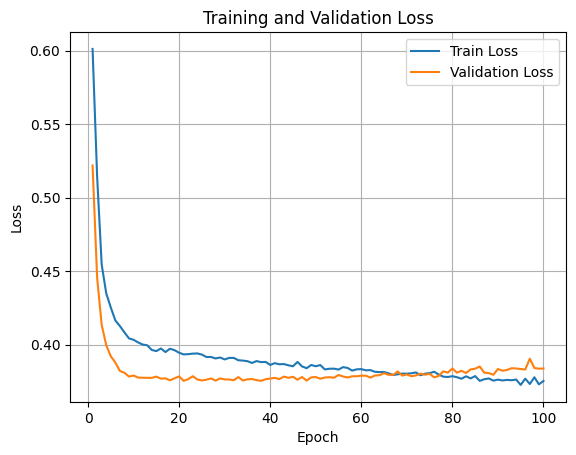

In [35]:
epochs = range(1, len(history['train loss'])+1)

plt.plot(epochs, history['train loss'], label='Train Loss')
plt.plot(epochs, history['validation loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [432]:
torch.save(model.state_dict(), "intrusion_model_weights.pth")

In [36]:
torch.save(model, "./save/intrusion_detector_full.pth")

In [ ]:
# use this to load the model without retraining
model = torch.load("./save/intrusion_detector_full.pth", weights_only=False)
model.eval()

IntrusionDetector(
  (network): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=1, bias=True)
  )
)